# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [6]:
nba = pd.read_csv('nba_games.csv')
print(nba.head())
#print(nba.dtypes)
print(nba.info())

        game_id  year_id  fran_id      opp_fran game_location  is_playoffs  \
0  194611010TRH     1947   Knicks       Huskies             A            0   
1  194611020CHS     1947   Knicks         Stags             A            0   
2  194611020PRO     1947  Celtics  Steamrollers             A            0   
3  194611050BOS     1947  Celtics         Stags             H            0   
4  194611070STB     1947   Knicks       Bombers             A            0   

   pts  opp_pts game_result  forecast  point_diff  
0   68       66           W  0.359935           2  
1   47       63           L  0.368899         -16  
2   53       59           L  0.359935          -6  
3   55       57           L  0.620204          -2  
4   68       63           W  0.339290           5  
game_id           object
year_id            int64
fran_id           object
opp_fran          object
game_location     object
is_playoffs        int64
pts                int64
opp_pts            int64
game_result       o

In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
print(nba_2010.head())
nba_2014 = nba[nba.year_id == 2014]
print(nba_2014.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

# Analyzing relationships between Quant and Categorical

### Task 1
The data has been subset for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [28]:
# task 1: create 2 series from nba_2010 that represent the points each team has scored in their games
knicks_pts_2010 = nba_2010[nba_2010.fran_id == 'Knicks']['pts']
nets_pts_2010 = nba_2010[nba_2010.fran_id == 'Nets']['pts']
print(knicks_pts_2010)
print(nets_pts_2010)

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64
21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64


### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?

In [29]:
# task 2: Calculate the difference between the two teams’ average points scored for 2010
# method 1
diff_means_2010 = knicks_pts_2010.mean() - nets_pts_2010.mean()
print(diff_means_2010) # 9.73
# I don't have enough information to judge whether fran_id and pts are associated as I don't know yet if 9.7 is a big difference or not. 
# If it's big, then there's an association.
# method 2
knicks_mean_score_2010 = np.mean(knicks_pts_2010)
print(knicks_mean_score_2010) # 102.1
nets_mean_score_2010 = np.mean(nets_pts_2010)
print(nets_mean_score_2010) # 92.4
diff_means_kinics_nets_2010 = knicks_mean_score_2010 - nets_mean_score_2010
print(diff_means_kinics_nets_2010) # 9.7

9.731707317073173
102.10975609756098
92.3780487804878
9.731707317073173


### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?


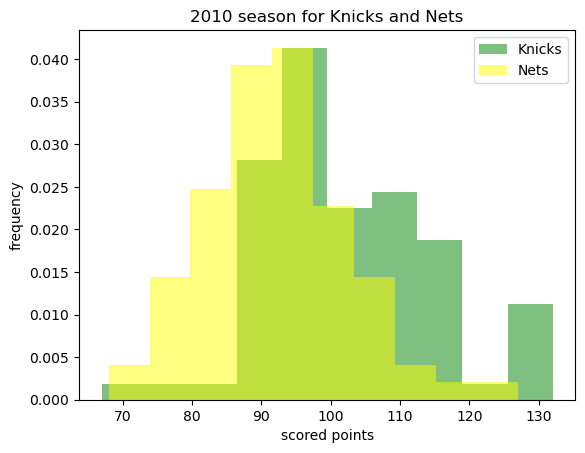

In [47]:
# task 3: Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets in 2010.
plt.hist(knicks_pts_2010, color='green', density = True, label='Knicks', alpha=0.5)
plt.hist(nets_pts_2010, color='yellow', density = True, label='Nets', alpha=0.5)
plt.xlabel('scored points')
plt.ylabel('frequency')
plt.legend()
plt.title('2010 season for Knicks and Nets')
plt.show()
plt.close()
# whislt both histograms overlap and have the same mode, they are quite different whith Knicks shited to the right and Nets shifted to the left.
# Knicks have scored more points than Nets

### Task 4
Now, let’s compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?


23469     90
23473     81
23480    100
23486     97
23490    101
        ... 
23849     91
23863    108
23867    100
23871    109
23875     95
Name: pts, Length: 82, dtype: int64
23468     94
23475    101
23482     86
23484    104
23494    108
        ... 
23900     86
23903     82
23906    104
23909     96
23912     94
Name: pts, Length: 94, dtype: int64
0.44706798131809933


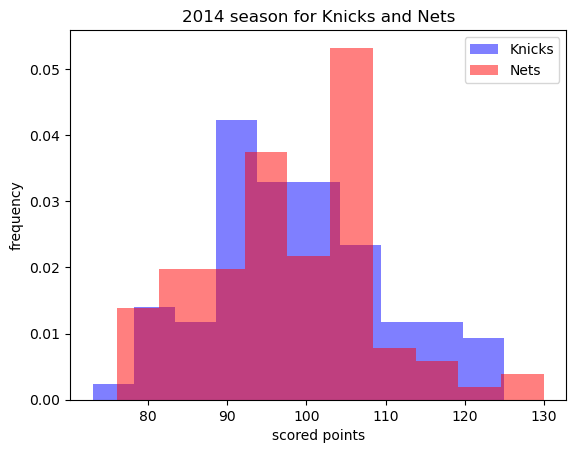

In [48]:
# task 4: repeat steps 1-3 for 2014
# create 2 series from nba_2014 that represent the points each team has scored in their games
knicks_pts_2014 = nba_2014[nba_2014.fran_id == 'Knicks']['pts']
nets_pts_2014 = nba_2014[nba_2014.fran_id == 'Nets']['pts']
print(knicks_pts_2014)
print(nets_pts_2014)
# Calculate the difference between the two teams’ average points scored for 2014
# method 1
diff_means_2014 = knicks_pts_2014.mean() - nets_pts_2014.mean()
print(diff_means_2014) # 0.44
# The mean difference is much smaller in 2014 (0.44) than in 2010 (9.7).
# Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets in 2014.
plt.hist(knicks_pts_2014, color='blue', density = True, label='Knicks', alpha=0.5)
plt.hist(nets_pts_2014, color='red', density = True, label='Nets', alpha=0.5)
plt.xlabel('scored points')
plt.ylabel('frequency')
plt.legend()
plt.title('2014 season for Knicks and Nets')
plt.show()
plt.close()
# the histograms fully overlap wich explains the small mean difference.

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?


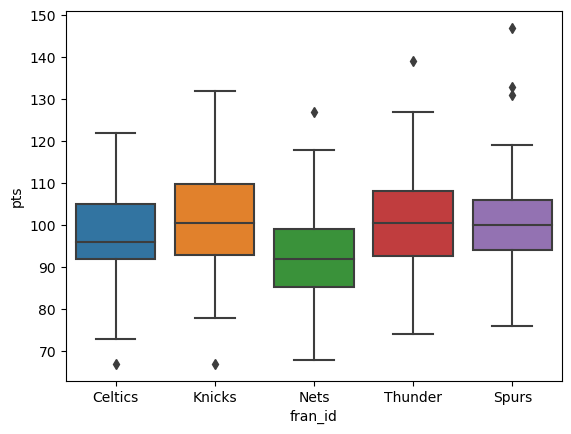

In [36]:
#plt.clf() #to clear the previous plot
# task 5: using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. 
# Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? 
# Which pairs of teams, if any, earn different average scores per game?
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()
plt.close()
# 4/ 5 boxes overlap except for the Nets who overall have scored less points

# Analyzing relationships between Categorical variables

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?`


In [37]:
# task 6: Calculate a table of frequencies that shows the counts of game_result and game_location.
# Save your result as location_result_freq and print your result. 
# Based on this table, do you think the variables are associated?
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)
# more games were lost when away, and more games were won at home. there's a likely association between both variables

game_location    A    H
game_result            
L              133  105
W               92  120


### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [40]:
# task 7: Convert this table of frequencies to a table of proportions.
location_result_proportions = location_result_freq / len(nba_2010)
print('observed contingency table:')
print(location_result_proportions)
# the percentage confirm what was assumed above

observed contingency table:
game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [41]:
# task 8: expected contingency table (Chi2) and Chi2 statistics
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print('expected contingency table (no association):')
print(np.round(expected))
print('Chi2 statistics:')
print(chi2) # 6.5, not much more than 4 therefore there is no association

expected contingency table (no association):
[[119. 119.]
 [106. 106.]]
Chi2 statistics:
6.501704455367053


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We're not there*

# Analyzing Relationships Between Quantitative Variables

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [42]:
# task 9: Using nba_2010, calculate the covariance between forecast (538's projected win probability) and point_diff (the margin of victory/defeat)
# what is the covariance between these two variables?
cov_forecast_pointdiff = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(cov_forecast_pointdiff) # covariance = 1.37. Small value therefore no relation between noth variables

[[  0.05   1.37]
 [  1.37 186.56]]


### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [43]:
# tas10: calculate the correlation between forecast and point_diff.
# Does this value suggest an association between the two variables?
corr_forecast_pointdiff, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(corr_forecast_pointdiff) # r2=0.44, there is no linear association between both variables

0.44020887084680815


### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

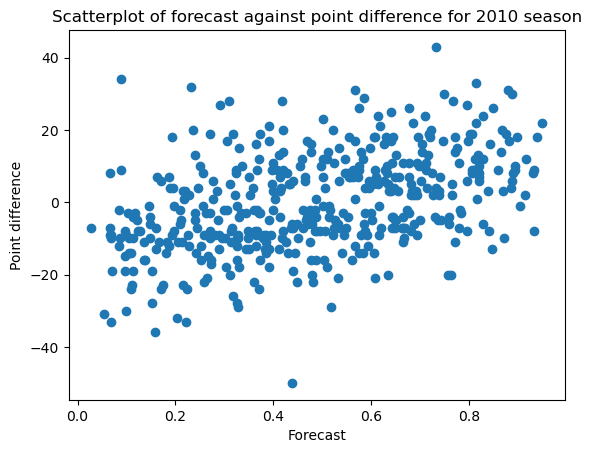

In [46]:
# task 11: scatterplot of forecast and point_diff
plt.scatter(x=nba_2010.forecast, y=nba_2010.point_diff)
plt.xlabel('Forecast')
plt.ylabel('Point difference')
plt.title('Scatterplot of forecast against point difference for 2010 season')
plt.show()
plt.close()
# this chart confirms the lack of correlation